In [131]:
from typing import Union

from collections import defaultdict
from itertools import combinations

import numpy as np
import cv2
from skimage.transform import rescale
from skimage.measure import label, find_contours
from skimage.filters import gaussian
from scipy.spatial.distance import cdist
import scipy.stats as st

In [132]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from skimage import io

In [133]:
#`numpy`, `scipy`, `scikit-image`, `scikit-learn`, `opencv` (4.5.4-dev).

In [134]:
COLORS = ('blue', 'green', 'black', 'yellow', 'red')
TRAINS2SCORE = {1: 1, 2: 2, 3: 4, 4: 7, 6: 15, 8: 21}

def predict_image(img: np.ndarray) -> (Union[np.ndarray, list], dict, dict):
    img1 = np.float32(img[:,:,0])
    template = img1[719:770,2842:2897]
    corr_skimage = skimage.feature.match_template(img1, template, pad_input=True)
    lbl, n = skimage.measure.label(corr_skimage >= 0.525, connectivity=2, return_num=True)
    city_centers = np.int16([np.round(np.mean(np.argwhere(lbl == i), axis=0)) for i in range(1, n + 1)])
    n_trains = {'blue': 20, 'green': 30, 'black': 0, 'yellow': 30, 'red': 0}
    scores = {'blue': 60, 'green': 90, 'black': 0, 'yellow': 45, 'red': 0}
    return city_centers, n_trains, scores

In [135]:
def predict_image(img: np.ndarray) -> (Union[np.ndarray, list], dict, dict):
    img1 = np.float32(img[:,:,0])
    template = img1[719:770,2842:2897]
    corr_skimage = skimage.feature.match_template(img1, template, pad_input=True)
    lbl, n = skimage.measure.label(corr_skimage >= 0.525, connectivity=2, return_num=True)
    city_centers = np.int64([np.round(np.mean(np.argwhere(lbl == i), axis=0)) for i in range(1, n + 1)])
    n_trains = {'blue': 20, 'green': 30, 'black': 0, 'yellow': 30, 'red': 0}
    scores = {'blue': 60, 'green': 90, 'black': 0, 'yellow': 45, 'red': 0}
    return city_centers, n_trains, scores

In [629]:
img = cv2.imread('train/all.jpg')
img0 = io.imread('train/all.jpg')
img1 = np.float32(img[:,:,0])

In [630]:
def plot_img(img):
    plt.figure(figsize=(24,12))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

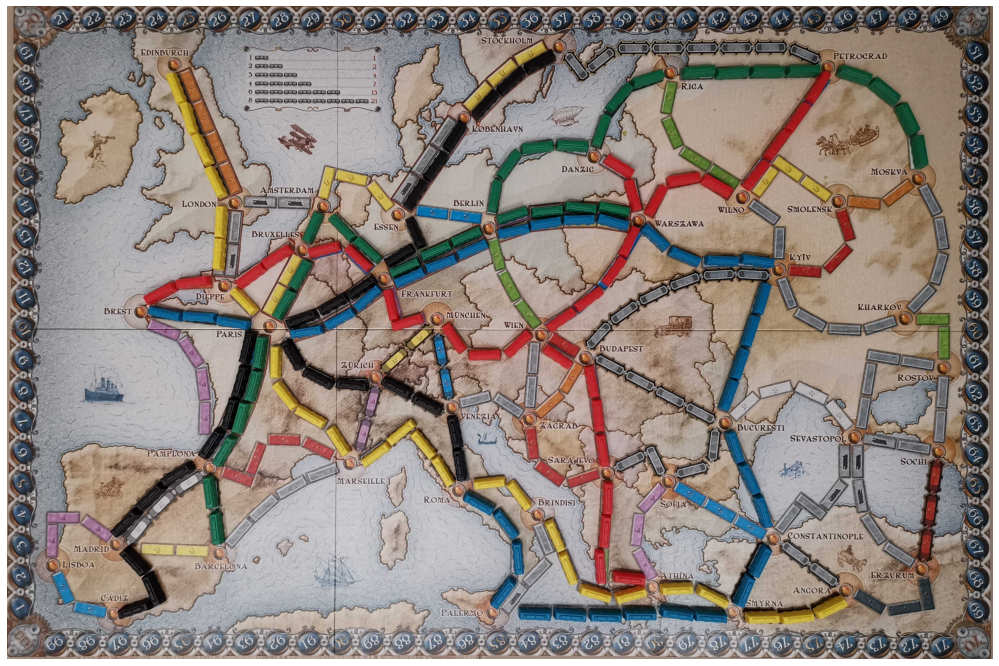

In [631]:
plot_img(img0)

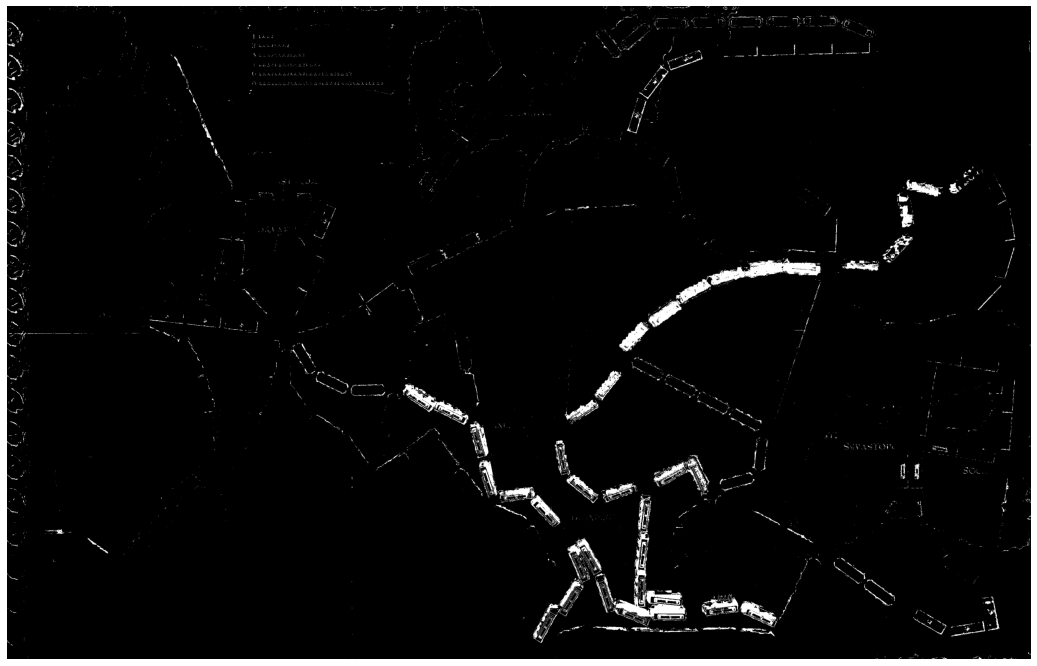

In [635]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2HSV)
blue_img = cv2.inRange(hsv_img, (15, 185, 0)
                         , (30, 255, 190)) #blue
blue=(blue_img > 0).astype(float)
plot_img(black)


In [636]:
HLS = cv2.cvtColor(img[110:2500,50:3800], cv2.COLOR_RGB2HLS)

In [637]:
HUE = HLS[:, :, 0]              # Split attributes
LIGHT = HLS[:, :, 1]
SAT = HLS[:, :, 2]

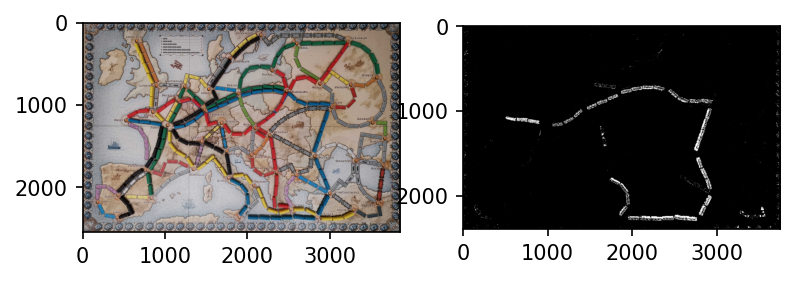

In [638]:
green = (HUE > 35) & (HUE < 61)

blue = (HUE > 17) & (HUE < 30)  & (LIGHT < 90) & (SAT < 235)

yellow = (HUE > 92) & (HUE < 100) & (SAT >137)

black = (LIGHT <40)&(SAT < 50) 

red = (HUE > 120) & (HUE <127) & (SAT > 0) & (LIGHT < 120)

plt.figure(dpi=150)
plt.subplot(1,2,1)   
# plt.axis('off')
plt.imshow(img0)
plt.subplot(1,2,2)     
# plt.axis('off')
plt.imshow(blue
           , cmap="gray")

In [639]:
HUE = HLS[:, :, 0]              # Split attributes
LIGHT = HLS[:, :, 1]
SAT = HLS[:, :, 2]

In [640]:
hls_img.shape

(2546, 3846, 3)

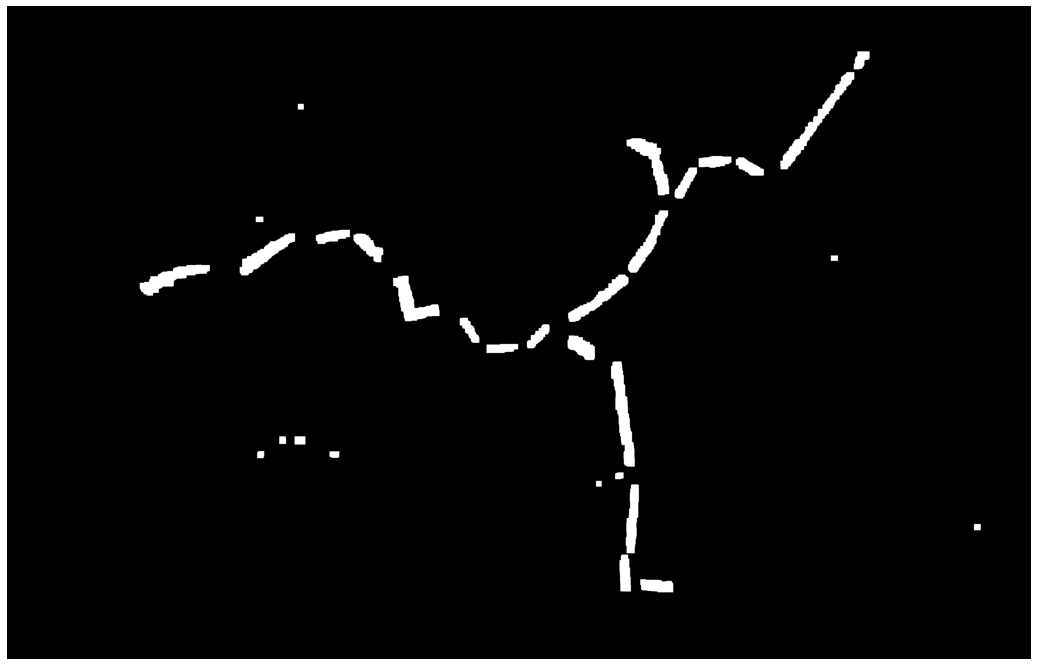

In [676]:
kernel = np.ones((15,15),np.uint8)
kernel1= np.ones((20,20),np.uint8)

green_closing = cv2.morphologyEx(green.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
green_opening = cv2.morphologyEx(green_closing, cv2.MORPH_OPEN, kernel1)

blue_closing = cv2.morphologyEx(blue.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
blue_opening = cv2.morphologyEx(blue_closing, cv2.MORPH_OPEN, kernel1)

yellow_closing = cv2.morphologyEx(yellow.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
yellow_opening = cv2.morphologyEx(yellow_closing, cv2.MORPH_OPEN, kernel1)

black_closing = cv2.morphologyEx(black.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
black_opening = cv2.morphologyEx(black_closing, cv2.MORPH_OPEN, kernel1)

red_closing = cv2.morphologyEx(red.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
red_opening = cv2.morphologyEx(red_closing, cv2.MORPH_OPEN, kernel1)



# plot_img(blue_closing) 
plot_img(red_opening) 



In [678]:
green_contours, green_hierarchy = cv2.findContours(green_opening, cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)
    
blue_contours, blue_hierarchy = cv2.findContours(blue_opening, cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)

yellow_contours, yellow_hierarchy = cv2.findContours(yellow_opening, cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)

black_contours, black_hierarchy = cv2.findContours(black_opening, cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)

red_contours, red_hierarchy = cv2.findContours(red_opening, cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)

In [679]:
def score(contours):
    score = 0
    count = 0
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 4000:
            if area < 7000:
                count +=1
                score += 1
            elif area < 13000:
                count +=2
                score += 2
            elif area < 22000:
                count +=3
                score += 4
            elif area < 29000:
                count +=4
                score += 7
            elif area < 37000:
                count +=6
                score += 15
            elif area< 48000:
                count +=8
                score += 21
    return count, score
green_count, green_score =score(red_contours)
green_count, green_score

(27, 29)

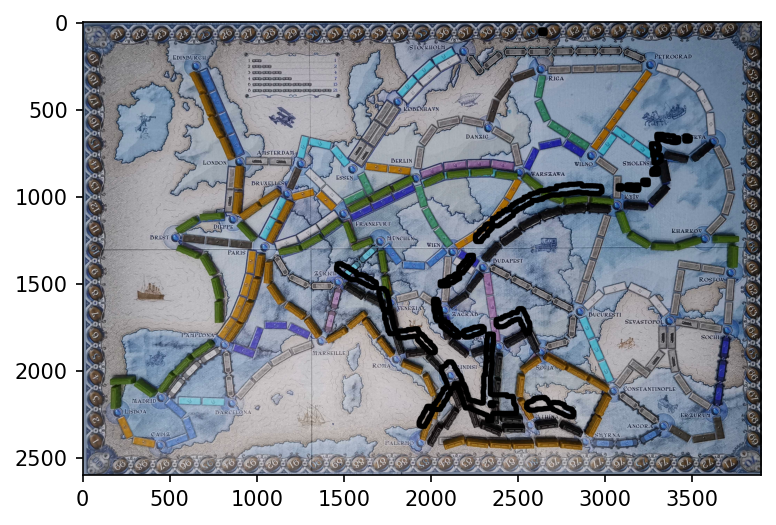

In [402]:
img_cnt = img.copy()
cv2.drawContours(img_cnt, contours, -1, (0,0,0), 30)
plt.figure(dpi=150)
plt.imshow(img_cnt)